In [99]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from cv2 import imread
from matplotlib.pyplot import imshow

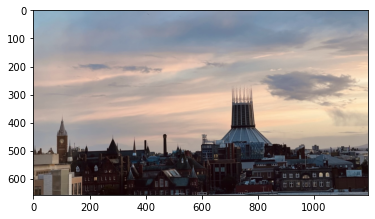

In [132]:
plt.set_cmap('gray')
image = imread('../liverpool_church.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imshow(image)

# Q1

a

In [101]:
def rgb_histogram(image):
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    histogram = [0]*3
# create the histogram plot, with three lines, one for
# each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram[channel_id], bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram[channel_id], color=c)
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.show()
    return histogram

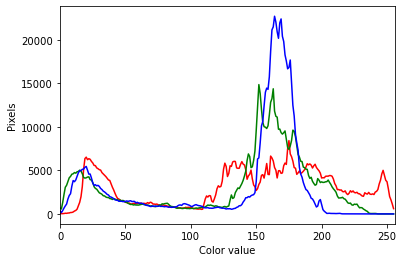

[array([  57,   32,   32,   47,   77,   68,  101,  109,  162,  166,  220,
        329,  399,  545,  949, 1333, 1978, 3148, 5133, 6360, 6525, 6233,
       6349, 6276, 6032, 5858, 5575, 5549, 5292, 5199, 5084, 5039, 4752,
       4602, 4445, 4293, 4103, 3903, 3849, 3447, 3073, 2753, 2373, 2031,
       1777, 1709, 1563, 1526, 1474, 1450, 1334, 1305, 1228, 1249, 1142,
       1137, 1206, 1231, 1172, 1184, 1249, 1173, 1252, 1150, 1229, 1189,
       1201, 1301, 1213, 1348, 1295, 1138, 1130, 1103, 1131, 1058, 1002,
       1018,  998, 1034,  967,  956,  898,  869,  765,  801,  788,  782,
        777,  743,  700,  679,  655,  663,  685,  663,  759,  725,  760,
        748,  722,  697,  609,  626,  586,  563,  555,  579,  524,  544,
       1131, 1712, 2063, 1939, 2107, 2079, 1475, 1353, 1744, 2192, 2898,
       3234, 3089, 3170, 3769, 5149, 5835, 5456, 4298, 4653, 5536, 5461,
       5973, 6047, 6029, 5287, 5241, 5253, 5696, 6008, 5722, 5620, 5070,
       3986, 4374, 4554, 5041, 4029, 3329, 3120, 2

In [102]:
histogram = rgb_histogram(image)
print(histogram)

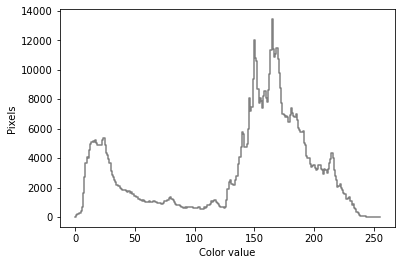

In [103]:
hist_grey, bin_edges = np.histogram(img_grey, bins=256, range=[0, 256])
plt.plot(bin_edges[0:-1], hist_grey, color='gray', ds='steps-mid')
plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()

b

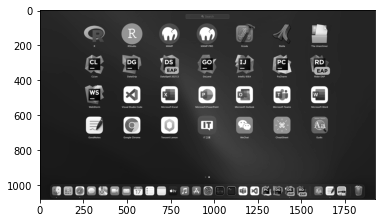

In [127]:
img_base = cv2.cvtColor(cv2.imread('base_screenshot.png'), cv2.COLOR_BGR2GRAY)
img_1 = cv2.cvtColor(cv2.imread('../liverpool_church.jpeg'), cv2.COLOR_BGR2GRAY)
img_2 = cv2.cvtColor(cv2.imread('screenshot_2.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img_base, cmap='gray')

In [128]:
def to_histogram(image):
    hist, bin_edges = np.histogram(image, bins=256, range=[0, 256])
    norm_his = hist/sum(hist)
    return norm_his, bin_edges

def to_inter(hist1, hist2):
    if len(hist1) != len(hist2):
        return
    res = 0
    for i in range(len(hist1)):
        res += min(hist1[i], hist2[i])
    return res

hist_base, bin_base = to_histogram(img_base)
hist_1, bin_1 = to_histogram(img_1)
hist_2, bin_2 = to_histogram(img_2)


inter_base_and_1 = to_inter(hist_base, hist_1)
inter_base_and_2 = to_inter(hist_base, hist_2)
inter_base_and_1, inter_base_and_2

(0.23569079953008143, 0.20201909722222233)

## Q2

In [129]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)

    == Output ==
    imgLBP : LBP converted image of the same shape as
    '''

    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return imgLBP

img_lbp = getLBPimage(img_grey)

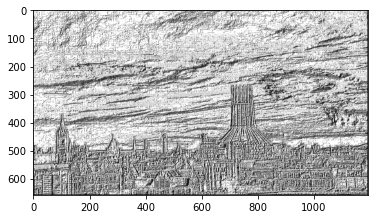

In [133]:
imshow(img_lbp)